In [10]:
import os
import time
import uuid #Universally Unique IDentifie

In [16]:
import cv2

In [17]:
IMAGES_PATH = os.path.join('data','images')
number_images=30

In [25]:
cap=cv2.VideoCapture(0)
for imgnum in range(number_images):
  print('collecting image {}'.format(imgnum))
  ret,frame=cap.read()
  imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
  cv2.imwrite(imgname, frame)
  cv2.imshow('frame',frame)
  time.sleep(0.5)

  if cv2.waitKey(1) & 0xFF==ord('q'):
    break

cap.release()
cv2.destroyAllWindows()

collecting image 0


[ WARN:0@377.762] global cap_v4l.cpp:997 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@377.764] global obsensor_uvc_stream_channel.cpp:159 getStreamChannelGroup Camera index out of range


error: OpenCV(4.9.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:786: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'


In [18]:
import tensorflow as tf
import json
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [19]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg',shuffle=False)

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: data\\images\\*.jpg'

In [ ]:
images.as_numpy_iterator().next()

b'data\\images\\8e33d2e6-ae14-11ed-aa13-846a0ee728ab.jpg'

In [8]:
def load_image(x):
    byte_image=tf.io.read_file(x)
    img=tf.io.decode_jpeg(byte_image)
    return img

In [9]:
images=images.map(load_image)

In [ ]:
images.as_numpy_iterator().next()

array([[[111, 111, 111],
        [112, 112, 112],
        [112, 112, 112],
        ...,
        [138, 140, 139],
        [138, 139, 141],
        [139, 140, 142]],

       [[112, 112, 112],
        [113, 113, 113],
        [113, 113, 113],
        ...,
        [138, 140, 139],
        [139, 140, 142],
        [140, 141, 143]],

       [[111, 111, 109],
        [111, 111, 109],
        [110, 110, 108],
        ...,
        [138, 140, 139],
        [139, 140, 142],
        [141, 142, 144]],

       ...,

       [[120, 121, 115],
        [121, 122, 116],
        [121, 122, 117],
        ...,
        [ 23,  23,  23],
        [ 23,  23,  23],
        [ 22,  22,  22]],

       [[122, 123, 118],
        [122, 123, 118],
        [121, 121, 119],
        ...,
        [ 24,  24,  24],
        [ 23,  23,  23],
        [ 22,  22,  22]],

       [[123, 124, 119],
        [122, 123, 118],
        [121, 121, 119],
        ...,
        [ 24,  24,  24],
        [ 22,  22,  22],
        [ 21,  21,  21]]

In [ ]:
image_generator = images.batch(4).as_numpy_iterator()

In [ ]:
plot_images = image_generator.next()

In [ ]:
flg,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [20]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data',folder,'images')):
        filename=file.split('.')[0]+'.json'
        existing_filepath=os.path.join('data','label',filename)
        if os.path.exists(existing_filepath):
            new_filepath=os.path.join('data',folder,'label',filename)
            os.replace(existing_filepath,new_filepath)

In [12]:
import albumentations as alb

In [13]:
augmentor=alb.Compose([alb.RandomCrop(width=450,height=450),
                       alb.HorizontalFlip(p=0.5),
                       alb.RandomBrightnessContrast(p=0.2),
                       alb.RandomGamma(p=0.2),
                       alb.RGBShift(p=0.2),
                       alb.VerticalFlip(p=0.5)  
                       ],
                       bbox_params=alb.BboxParams(format='albumentations',
                         label_fields=['class_labels']))

In [ ]:
img=cv2.imread(os.path.join('data','train','images','8e33d2e6-ae14-11ed-aa13-846a0ee728ab.jpg'))

In [ ]:
img.shape

(480, 640, 3)

In [14]:
with open(os.path.join('data','train','label','8e33d2e6-ae14-11ed-aa13-846a0ee728ab.json'),'r') as f:
    label=json.load(f)

In [ ]:
label

In [ ]:
type(label)

dict

In [ ]:
label['shapes'][0]['points']

[[290.2380952380953, 141.19047619047615], [545.0, 438.8095238095238]]

In [ ]:
coords=[0,0,0,0]
coords[0]=label['shapes'][0]['points'][0][0]
coords[1]=label['shapes'][0]['points'][0][1]
coords[2]=label['shapes'][0]['points'][1][0]
coords[3]=label['shapes'][0]['points'][1][1]

In [ ]:
coords

[290.2380952380953, 141.19047619047615, 545.0, 438.8095238095238]

In [ ]:
coords =list(np.divide(coords,[640,480,640,480]))

In [ ]:
coords

[0.4534970238095239, 0.2941468253968253, 0.8515625, 0.9141865079365079]

In [17]:
augmented = augmentor(image=img,bboxes=[coords],class_labels=['face'])

In [ ]:
augmented #dict type

{'image': array([[[116, 119, 123],
         [117, 120, 124],
         [118, 121, 126],
         ...,
         [ 18,  20,  21],
         [ 17,  18,  18],
         [ 16,  18,  18]],
 
        [[115, 118, 122],
         [115, 118, 122],
         [116, 119, 124],
         ...,
         [ 19,  21,  22],
         [ 18,  19,  20],
         [ 17,  18,  18]],
 
        [[114, 118, 119],
         [113, 116, 120],
         [113, 116, 121],
         ...,
         [ 18,  22,  23],
         [ 18,  19,  20],
         [ 18,  19,  20]],
 
        ...,
 
        [[108, 113, 112],
         [106, 111, 110],
         [108, 114, 113],
         ...,
         [149, 149, 149],
         [148, 148, 148],
         [146, 146, 146]],
 
        [[110, 115, 114],
         [108, 113, 112],
         [105, 110, 109],
         ...,
         [147, 147, 147],
         [146, 146, 146],
         [144, 144, 144]],
 
        [[112, 117, 116],
         [111, 116, 115],
         [108, 113, 112],
         ...,
         [145, 145,

In [18]:
augmented['bboxes']

[(0.23487528344671194,
  0.0787301587301587,
  0.6226303854875282,
  0.5662585034013605)]

In [ ]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2],[450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:],[450,450]).astype(int)),
              (255,0,0),2
              )
plt.imshow(augmented['image'])

In [20]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.0001,0.0001]
        label_path = os.path.join('data', partition, 'label', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'label', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.8069196428571429, 0.32886904761904756, 0.39769345238095244, 0.8794642857142858, 'face'].
x_max is less than or equal to x_min for bbox [0.8031994047619048, 0.8397817460317462, 0.42373511904761907, 0.2693452380952381, 'face'].
x_max is less than or equal to x_min for bbox [0.8069196428571429, 0.8596230158730159, 0.40513392857142866, 0.29910714285714285, 'face'].
y_max is less than or equal to y_min for bbox [0.45774872448979603, 0.8794642857142857, 0.8244579081632653, 0.32036564625850333, 'face'].
x_max is less than or equal to x_min for bbox [0.7957589285714287, 0.8447420634920634, 0.4386160714285715, 0.2941468253968253, 'face'].
x_max is less than or equal to x_min for bbox [0.1633184523809524, 0.2395833333333332, 0.003348214285714306, 0.6909722222222222, 'face'].
x_max is less than or equal to x_min for bbox [0.6411033163265307, 0.3798894557823129, 0.3925586191923579, 0.0, 'face'].
x_max is less than or equal to x_min for bbox [0.49601

In [7]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

NameError: name 'tf' is not defined

In [37]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [38]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [39]:
train_images.as_numpy_iterator().next()

array([[[0.49215686, 0.49215686, 0.48431373],
        [0.50539213, 0.50802696, 0.4922794 ],
        [0.48952207, 0.49344364, 0.4738358 ],
        ...,
        [0.58253676, 0.5903799 , 0.5864583 ],
        [0.5882353 , 0.59607846, 0.5921569 ],
        [0.57984066, 0.58278185, 0.5813113 ]],

       [[0.5071691 , 0.5071691 , 0.499326  ],
        [0.4990196 , 0.4990196 , 0.49117646],
        [0.51770836, 0.51770836, 0.5098652 ],
        ...,
        [0.59705883, 0.59705883, 0.5892157 ],
        [0.5926471 , 0.5926471 , 0.58480394],
        [0.5939338 , 0.5939338 , 0.5909926 ]],

       [[0.5107843 , 0.5107843 , 0.5029412 ],
        [0.50349265, 0.50349265, 0.49564952],
        [0.5093137 , 0.5132353 , 0.49362746],
        ...,
        [0.59957105, 0.59957105, 0.5917279 ],
        [0.60294116, 0.60294116, 0.595098  ],
        [0.59656864, 0.59656864, 0.59362745]],

       ...,

       [[0.22959559, 0.253125  , 0.24528186],
        [0.24025735, 0.27408087, 0.2628064 ],
        [0.23566176, 0

In [40]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [41]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\label\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [35]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\label\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [42]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\label\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.     , 0.05154, 0.355  , 0.713  ], dtype=float16))

In [ ]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(2820, 2820, 660, 660, 720, 720)

In [43]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)


In [44]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [45]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [ ]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0]], dtype=uint8),
 array([[0.393  , 0.3127 , 1.     , 0.9    ],
        [0.2505 , 0.04346, 0.6226 , 0.506  ],
        [0.2478 , 0.12195, 0.658  , 0.58   ],
        [0.4976 , 0.071  , 1.     , 0.658  ],
        [0.2795 , 0.336  , 0.8774 , 0.9707 ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.     , 0.     , 0.     , 0.     ]], dtype=float16))

In [46]:
data_samples = train.as_numpy_iterator()

In [47]:
res = data_samples.next()

In [ ]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx in range(4):
    sample_image=res[0][idx]
    sample_coords=res[1][1][idx]

    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2],[120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:],[120,120]).astype(int)),
                  (255,0,0),2
                  )
    ax[idx].imshow(sample_image)

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,Dense,GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

2024-02-19 17:10:04.139860: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-19 17:10:04.442629: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-19 17:10:04.442816: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-19 17:10:04.492441: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-19 17:10:04.600556: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-19 17:10:04.603164: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
vgg =VGG16(include_top=False)

58889256/58889256 [==============================] - 19s 0us/step


In [ ]:
vgg.summary()

In [3]:
def build_model():
    input_layer=Input(shape=(120,120,3))

    vgg=VGG16(include_top=False)(input_layer)

    f1=GlobalMaxPooling2D()(vgg)
    class1=Dense(2048,activation='relu')(f1)
    class2=Dense(1,activation='sigmoid')(class1)

    f2=GlobalMaxPooling2D()(vgg)
    regress1=Dense(2048,activation='relu')(f2)
    regress2=Dense(4,activation='sigmoid')(regress1)

    facetracker=Model(inputs=input_layer,outputs=[class2,regress2])
    return facetracker

In [4]:
facetracker = build_model()

In [5]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [6]:
X,y=train.as_numpy_iterator().next()

NameError: name 'train' is not defined

In [ ]:
X.shape

(8, 120, 120, 3)

In [52]:
classes,coords=facetracker.predict(X)

1/1 [==============================] - 3s 3s/step


In [ ]:
classes,coords

(array([[0.51568204],
        [0.46882787],
        [0.45293844],
        [0.4879689 ],
        [0.41474068],
        [0.45207044],
        [0.506752  ],
        [0.41744217]], dtype=float32),
 array([[0.6058916 , 0.5007419 , 0.45747864, 0.5826036 ],
        [0.58959806, 0.48471174, 0.49093276, 0.5613574 ],
        [0.60996133, 0.5039923 , 0.46545777, 0.53171384],
        [0.59114105, 0.5799039 , 0.44288942, 0.5288936 ],
        [0.612199  , 0.4938106 , 0.43542266, 0.5694853 ],
        [0.5219619 , 0.50932294, 0.36620107, 0.40687215],
        [0.6272208 , 0.43871537, 0.44329906, 0.5571366 ],
        [0.6319246 , 0.54699713, 0.37216404, 0.49415842]], dtype=float32))

In [53]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [54]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

In [55]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size


In [56]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [57]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.222393>

In [58]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.67757213>

In [59]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.222393>

In [60]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)


In [61]:
model = FaceTracker(facetracker)

In [62]:
model.compile(opt, classloss, regressloss)

In [63]:
logdir='logs'

In [64]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [72]:
hist = model.fit(train, epochs=5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5
353/353 [==============================] - 2655s 7s/step - total_loss: 0.4980 - class_loss: 0.1296 - regress_loss: 0.4332 - val_total_loss: 0.1115 - val_class_loss: 0.0377 - val_regress_loss: 0.0926
Epoch 2/5
353/353 [==============================] - 1748s 5s/step - total_loss: 0.1352 - class_loss: 0.0340 - regress_loss: 0.1182 - val_total_loss: 0.0619 - val_class_loss: 6.6161e-04 - val_regress_loss: 0.0616
Epoch 3/5
353/353 [==============================] - 1758s 5s/step - total_loss: 0.0864 - class_loss: 0.0198 - regress_loss: 0.0765 - val_total_loss: 0.0166 - val_class_loss: 1.1725e-04 - val_regress_loss: 0.0165
Epoch 4/5
353/353 [==============================] - 1992s 6s/step - total_loss: 0.0607 - class_loss: 0.0143 - regress_loss: 0.0535 - val_total_loss: 0.0580 - val_class_loss: 1.1646e-04 - val_regress_loss: 0.0580
Epoch 5/5
353/353 [==============================] - 2838s 8s/step - total_loss: 0.0409 - class_loss: 0.0059 - regress_loss: 0.0379 - val_total_loss: 0.

In [73]:
hist.history

{'total_loss': [0.0513562373816967,
  0.03761402145028114,
  0.011410933919250965,
  0.006702887825667858,
  0.008502128534018993],
 'class_loss': [0.0068357838317751884,
  0.01662796176970005,
  0.0016117176273837686,
  1.727067501633428e-05,
  5.3974741604179144e-05],
 'regress_loss': [0.04793834686279297,
  0.029300039634108543,
  0.010605075396597385,
  0.006694252602756023,
  0.00847514159977436],
 'val_total_loss': [0.1114523857831955,
  0.061911653727293015,
  0.016561100259423256,
  0.058016225695610046,
  0.166518896818161],
 'val_class_loss': [0.03773254528641701,
  0.0006616127211600542,
  0.00011725341028068215,
  0.00011645982885966077,
  0.07219870388507843],
 'val_regress_loss': [0.09258611500263214,
  0.0615808479487896,
  0.01650247350335121,
  0.05795799568295479,
  0.1304195523262024]}

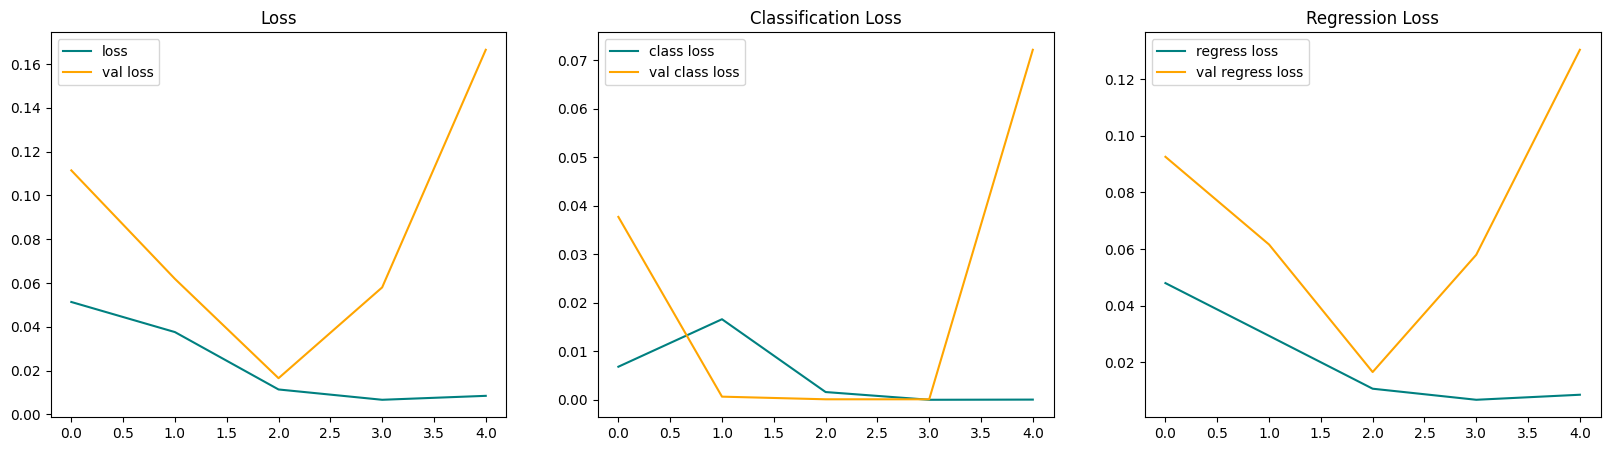

In [74]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()


In [75]:
test_data = test.as_numpy_iterator()

In [76]:
test_sample = test_data.next()

In [77]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 2s 2s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


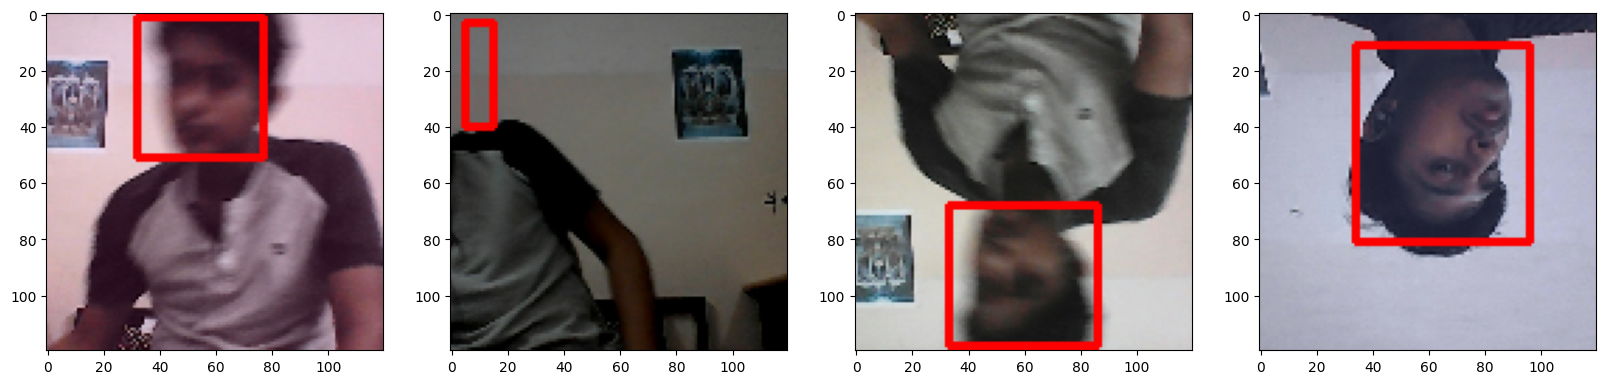

In [78]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)


In [21]:
from tensorflow.keras.models import load_model

In [80]:
facetracker.save('facetracker.h5')

In [22]:
facetracker = load_model('facetracker.h5')

In [23]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 204ms/step
